In [1]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from math import sqrt
import matplotlib
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.layers import Dropout
import keras
import numpy as np

Using TensorFlow backend.


In [2]:
# MAPE
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [33]:
# Python
import pandas as pd
import numpy as np
from fbprophet import Prophet

dataset = read_csv("dataset.csv")
dataset_ = dataset[["date", "time","na_entry"]]

dataset_['time'] = pd.to_datetime(dataset_['time'], format='%H').dt.time
dataset_['date'] = pd.to_datetime(dataset_['date'], format='%Y-%d-%M').dt.date
dataset_["ds"]=dataset_.apply(lambda r : pd.datetime.combine(r['date'],r['time']),1)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versu

In [ ]:
date_range(start=None, end=None, periods=None, freq='D')

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/usr/local/lib/python3.5/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will b

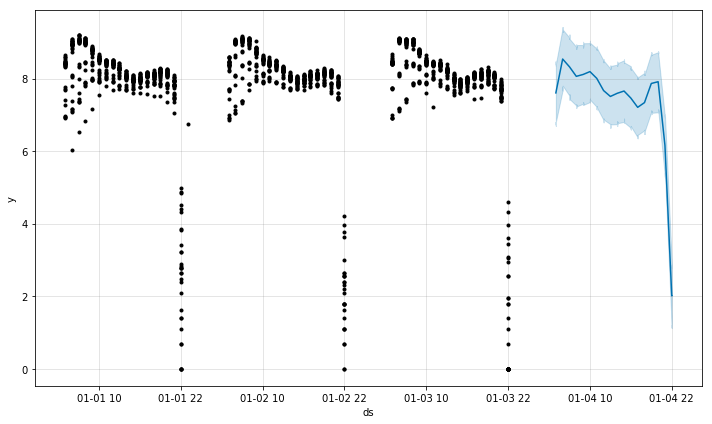

In [59]:

dataset1 = dataset_[["ds","na_entry"]]
dataset1['na_entry'] = [1 if x == 0 else x for x in dataset1['na_entry']]
dataset1['na_entry'] = np.log(dataset1['na_entry'])
dataset1.columns = ['ds', 'y']

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(dataset1[:1620]);

#future = m.make_future_dataframe(periods=213)
#future.tail()
future=pd.DataFrame(dataset1['ds'][1620:], index=None)
future.reset_index(inplace=True)
del future['index']

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
m.plot(forecast)


In [68]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

dataset = read_csv("dataset.csv")
series = dataset[["na_entry"]]


/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [69]:
series

,na_entry
0,418
1,689
2,926
3,1283
4,1903
5,2470
6,2193
7,2228
8,2215
9,1982


/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=-41.688310, expected=2321.000000
predicted=3445.360376, expected=3466.000000
predicted=3585.244907, expected=4185.000000
predicted=4230.143330, expected=4380.000000
predicted=3802.874178, expected=4071.000000
predicted=3552.252759, expected=3264.000000
predicted=2996.723908, expected=3401.000000
predicted=3591.867674, expected=3750.000000
predicted=3924.939628, expected=3252.000000
predicted=3236.114291, expected=2642.000000
predicted=2644.047324, expected=2724.000000
predicted=2883.857037, expected=2536.000000
predicted=2639.704514, expected=3036.000000
predicted=3292.224176, expected=3190.000000
predicted=3133.621808, expected=2917.000000
predicted=2802.707581, expected=2345.000000
predicted=2222.015944, expected=1643.000000
predicted=1655.782094, expected=0.000000
predicted=30.376896, expected=1007.000000
predicted=1786.581348, expected=1332.000000
predicted=1506.402530, expected=1589.000000
predicted=1758.986096, expected=2529.000000
predicted=2474.265597, expected=2685.0

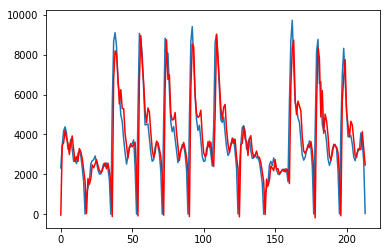

In [75]:
X = series.values
size = 1620
train, test = X[0:size], X[size:len(X)]
history = [float(x) for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


# plot
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()

In [88]:
sqrt(mean_squared_error(test, predictions))

1252.2886698657503

In [86]:
error = sqrt(mean_squared_error(test[:213], predictions[1:]))
error

554.0482118662046

In [62]:
forecast

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,daily,daily_lower,daily_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,yearly,yearly_lower,yearly_upper,yhat
0,2017-01-04 05:00:00,2.786061,2.777674,2.793702,6.783432,8.492906,2.815322,2.815322,2.815322,4.821698,4.821698,4.821698,4.821698,4.821698,4.821698,2.006376,2.006376,2.006376,7.607759
1,2017-01-04 05:00:00,2.786061,2.777674,2.793702,6.787640,8.387234,2.815322,2.815322,2.815322,4.821698,4.821698,4.821698,4.821698,4.821698,4.821698,2.006376,2.006376,2.006376,7.607759
2,2017-01-04 05:00:00,2.786061,2.777674,2.793702,6.765976,8.397606,2.815322,2.815322,2.815322,4.821698,4.821698,4.821698,4.821698,4.821698,4.821698,2.006376,2.006376,2.006376,7.607759
3,2017-01-04 05:00:00,2.786061,2.777674,2.793702,6.753360,8.418538,2.815322,2.815322,2.815322,4.821698,4.821698,4.821698,4.821698,4.821698,4.821698,2.006376,2.006376,2.006376,7.607759
4,2017-01-04 05:00:00,2.786061,2.777674,2.793702,6.811590,8.445445,2.815322,2.815322,2.815322,4.821698,4.821698,4.821698,4.821698,4.821698,4.821698,2.006376,2.006376,2.006376,7.607759
5,2017-01-04 05:00:00,2.786061,2.777674,2.793702,6.698759,8.354224,2.815322,2.815322,2.815322,4.821698,4.821698,4.821698,4.821698,4.821698,4.821698,2.006376,2.006376,2.006376,7.607759
6,2017-01-04 05:00:00,2.786061,2.777674,2.793702,6.817580,8.419188,2.815322,2.815322,2.815322,4.821698,4.821698,4.821698,4.821698,4.821698,4.821698,2.006376,2.006376,2.006376,7.607759
7,2017-01-04 05:00:00,2.786061,2.777674,2.793702,6.733479,8.471954,2.815322,2.815322,2.815322,4.821698,4.821698,4.821698,4.821698,4.821698,4.821698,2.006376,2.006376,2.006376,7.607759
8,2017-01-04 05:00:00,2.786061,2.777674,2.793702,6.795804,8.398595,2.815322,2.815322,2.815322,4.821698,4.821698,4.821698,4.821698,4.821698,4.821698,2.006376,2.006376,2.006376,7.607759
9,2017-01-04 05:00:00,2.786061,2.777674,2.793702,6.779965,8.483371,2.815322,2.815322,2.815322,4.821698,4.821698,4.821698,4.821698,4.821698,4.821698,2.006376,2.006376,2.006376,7.607759


In [97]:
mrt_status_1 = read_csv("mrt_status.csv")
dataset = read_csv("dataset.csv")
mrt_status = mrt_status_1
mrt_status.head()
mrt_status["day"] = mrt_status.day.apply(lambda x: pd.to_datetime(x).strftime('%Y/%m/%d'))
mrt_status = mrt_status.rename(columns={'day': 'date'})
dataset["date"] = dataset.date.apply(lambda x: pd.to_datetime(x).strftime('%Y/%m/%d'))

new_time = []
for i in range(len(mrt_status.time.values)):
    temp = mrt_status.time[i].split(":")
    if "PM" in temp[1]:
        new_time.append(int(temp[0]) + 12)
    elif "AM" in temp[1]:
        new_time.append(int(temp[0]))
        
new_time = pd.Series(new_time)

mrt_status["time"] = new_time.values

#CAT types
s = pd.Series(list(mrt_status.cat_type.values))
cat_types=pd.get_dummies(s)

sta = pd.Series(list(mrt_status.station.values))
mrt_types = pd.get_dummies(sta)

#direction
dire = pd.Series(list(mrt_status.dir.values))
direction = pd.get_dummies(dire)
mrt_status = mrt_status.join(cat_types)
mrt_status = mrt_status.join(direction)
mrt_status = mrt_status.join(mrt_types)



df1 = pd.merge(dataset, mrt_status, on=['time', 'date'], how='left')
df1 = df1.fillna(value=0)
df1.to_csv("final_dataset.csv", index=None)
final_dataset = df1[["time", "holiday", "days", "weekday", "na_entry", "CAT 1", "CAT 2", "CAT 3", "CAT 4", "North Bound"]]

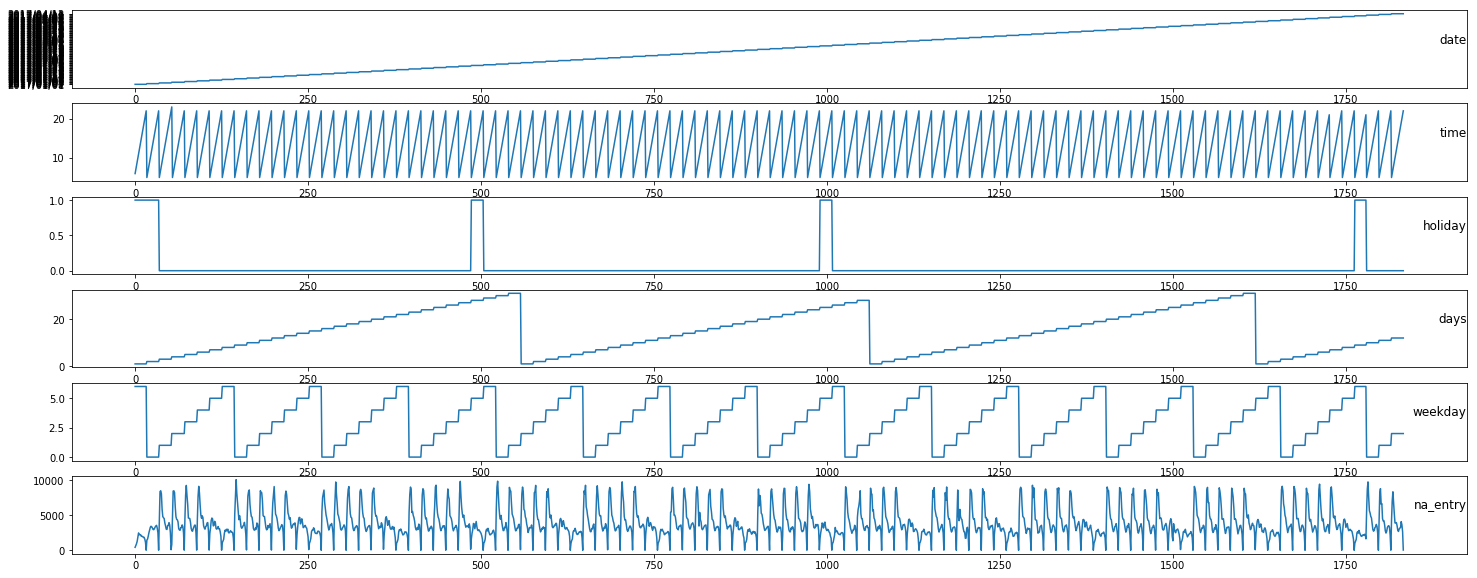

In [4]:
data = dataset[["date", "time", "holiday", "days", "weekday", "na_entry"]]
values = data.values

groups = [0,1,2,3,4,5]
i = 1

plt.figure(figsize=(25,10))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(data.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

51

In [119]:

final_dataset_ever = pd.read_csv("final_dataset.csv")
del final_dataset_ever['date']
values = final_dataset_ever.values

groups = [0,1,2,3,4,5,6]
i = 51

plt.figure(figsize=(25,10))
for group in range(len(final_dataset_ever.columns)):
    plt.subplot(len(final_dataset_ever.columns), 1, i)
    plt.plot(values[:, group])
    plt.title(final_dataset_ever.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

ValueError: num must be 1 <= num <= 51, not 52

In [268]:

def mape1(y_true, y_pred): 

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Test MSE: 1401.418
0.5344848098459296
890.5140186915888
Test RMSE: 1401.418


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


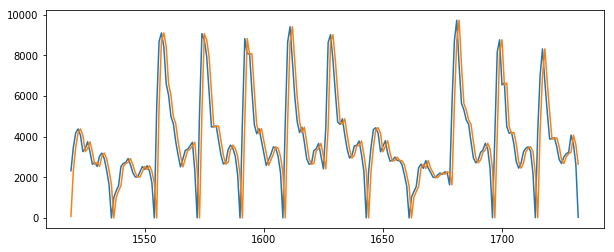

In [155]:
dataset = read_csv("dataset.csv")
dataset_ = dataset[["na_entry"]]


dataset_['na_entry'] = [1 if x == 0 else x for x in dataset_['na_entry']]

data_frame = concat([dataset_.shift(1), dataset_], axis=1)
data_frame.columns = ['t1', 't2']

# split into train and test sets
X = data_frame.values
train_size = 1520
val_size = 1620
train, validation, test = X[1:train_size], X[train_size:val_size], X[val_size:]
train_X, train_y = train[:,0], train[:,1]
val_X, val_y = validation[:,0], validation[:,1]
test_X, test_y = test[:,0], test[:,1]

# Naive Model
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = np.sqrt(mean_squared_error(test_y, predictions))
error = sqrt(mean_squared_error(test_y, predictions))
r2 = r2_score(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
print('Test MSE: %.3f' % error)
print(r2)
print(mae)
print('Test RMSE: %.3f' % test_score)
# plot predictions and expected results
plt.figure(figsize=(10,4))
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()

In [161]:
# MLP Model
#dataset = final_dataset[["na_entry","time", "holiday", "days", "weekday", "CAT 1", "CAT 2", "CAT 3", "CAT 4", "North Bound"]]
final_dataset_ever = pd.read_csv("final_dataset.csv")
del final_dataset_ever['date']
dataset = final_dataset_ever

train_size = 1520
val_size = 1620

y_output = dataset["na_entry"].shift(1)
y_output = y_output[1:]
y_unscaled_test = y_output[val_size:]

scaler = MinMaxScaler(feature_range=(0, 1))
scaler1 = MinMaxScaler(feature_range=(0, 1))

scaler_X = scaler.fit(dataset[1:])
y_scaled = scaler1.fit_transform(y_output[:, np.newaxis])

dataset_scaled = scaler_X.transform(dataset[1:])

train, validation, test = dataset_scaled[:train_size], dataset_scaled[train_size:val_size], dataset_scaled[val_size:]
train_X, train_y = train, y_scaled[:train_size]
val_X, val_y = validation, y_scaled[train_size:val_size]
test_X, test_y = test, y_scaled[val_size:]

#inverse scale
#print(scaler.inverse_transform(test_y))

def fit_model(train_X, train_y, test_X, test_y, epochs):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=train_X.shape[1]))
    model.add(Dropout(0.10))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(1))
    adam = keras.optimizers.Adam(lr=0.009, beta_1=0.9, beta_2=0.999, decay= 0.000007, epsilon=None, amsgrad=True)
    model.compile(loss='mean_squared_error', optimizer= adam, metrics=['mse'])
    history = model.fit(train_X, train_y, epochs=epochs, 
              batch_size=16, validation_data=(test_X, test_y), 
              verbose=2, shuffle=False)
    
    return model, history

In [162]:
# Fit MLP Model
final_model, history = fit_model(train_X, train_y, val_X, val_y, 2250)

results = final_model.predict(val_X)
print('Validation MSE: %.5f' % mean_squared_error(val_y, results))

Train on 1520 samples, validate on 100 samples
Epoch 1/2250
 - 0s - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 2/2250
 - 0s - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 3/2250
 - 0s - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 4/2250
 - 0s - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 5/2250
 - 0s - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 6/2250
 - 0s - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 7/2250
 - 0s - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 8/2250
 - 0s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 9/2250
 - 0s - loss: 0.0058

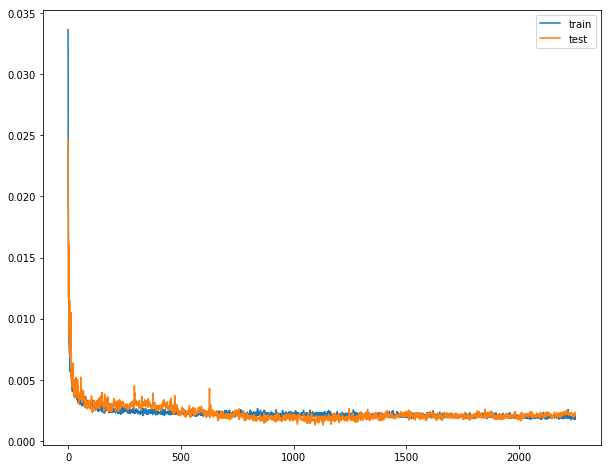

In [163]:
# Plot training and validation performance
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [164]:
h = scaler1.inverse_transform(results)

Test Mse: 0.003
Test RMse: 543.110
Test MSE: 543.110
0.9293314734707612
345.3407591340687


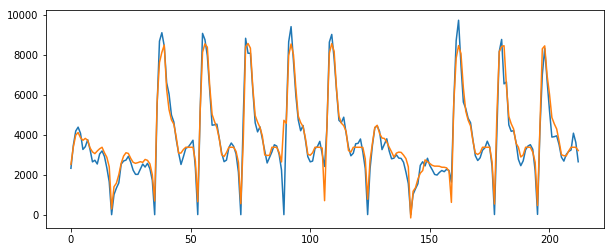

In [166]:
# Final Test MSE
stored_results = final_model.predict(test_X)
print("Test Mse: %.3f" % mean_squared_error(test_y, stored_results))
h = scaler1.inverse_transform(stored_results)

print("Test RMse: %.3f" % sqrt(mean_squared_error(y_unscaled_test.values, h)))
error = sqrt(mean_squared_error(y_unscaled_test.values, h))
r2 = r2_score(y_unscaled_test.values, h)
mae = mean_absolute_error(y_unscaled_test.values, h)
print('Test MSE: %.3f' % error)
print(r2)
print(mae)
plt.figure(figsize=(10,4))
plt.plot([x for x in y_unscaled_test.values])
plt.plot([x for x in h])
plt.show()

In [221]:
len(h)

213

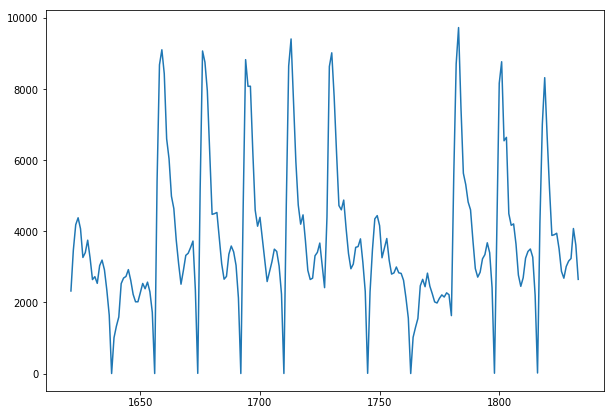

In [341]:
plt.figure(figsize=(10,7))
plt.plot(y_unscaled_test)
plt.show()

Test RMse: 483.712


ValueError: y_true and y_pred have different number of output (2!=1)

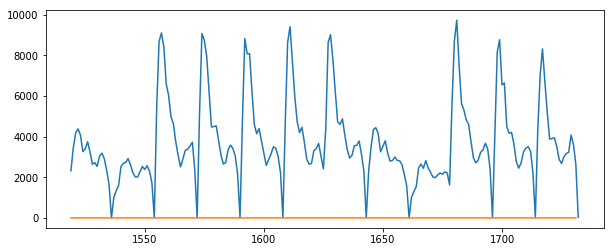

In [156]:
# Compare Predicted values to True Valuse of test set
plt.figure(figsize=(10,4))
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in stored_results])
plt.show()

predicted=677.666667, expected=1283.000000
predicted=966.000000, expected=1903.000000
predicted=1370.666667, expected=2470.000000
predicted=1885.333333, expected=2193.000000
predicted=2188.666667, expected=2228.000000
predicted=2297.000000, expected=2215.000000
predicted=2212.000000, expected=1982.000000
predicted=2141.666667, expected=1993.000000
predicted=2063.333333, expected=1944.000000
predicted=1973.000000, expected=1825.000000
predicted=1920.666667, expected=1846.000000
predicted=1871.666667, expected=1585.000000
predicted=1752.000000, expected=1144.000000
predicted=1525.000000, expected=12.000000
predicted=913.666667, expected=1448.000000
predicted=868.000000, expected=1589.000000
predicted=1016.333333, expected=2013.000000
predicted=1683.333333, expected=2509.000000
predicted=2037.000000, expected=2910.000000
predicted=2477.333333, expected=3273.000000
predicted=2897.333333, expected=3418.000000
predicted=3200.333333, expected=3341.000000
predicted=3344.000000, expected=3175.0

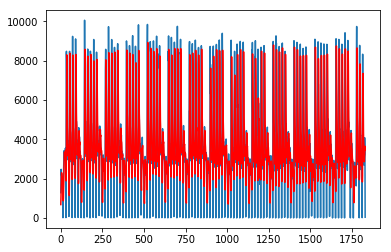

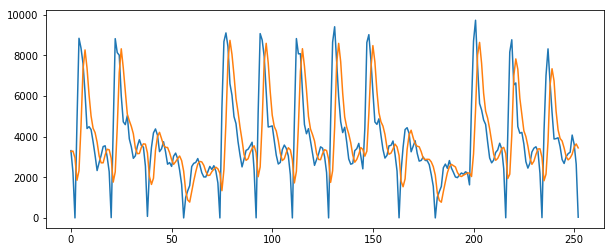

In [169]:
from pandas import Series
from numpy import mean
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from matplotlib import pyplot

dataset = read_csv("dataset.csv")
data = dataset[["na_entry"]]
# prepare situation
X = data.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
    
error = sqrt(mean_squared_error(test, predictions))
r2 = r2_score(test, predictions)
mae = mean_absolute_error(test, predictions)
print('Test MSE: %.3f' % error)
print(r2)
print(mae)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
plt.figure(figsize=(10,4))
pyplot.plot(test[(len(X) - 256):])
pyplot.plot(predictions[(len(X) - 256):])
pyplot.show()


/usr/local/lib/python3.5/dist-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds
1828,2017-10-26
1829,2017-10-27
1830,2017-10-28
1831,2017-10-29
1832,2017-10-30


,ds,yhat,yhat_lower,yhat_upper
1828,2017-10-26,13.184695,11.131199,15.136387
1829,2017-10-27,13.278527,11.395081,15.283376
1830,2017-10-28,12.876856,11.027614,14.706293
1831,2017-10-29,12.498095,10.531015,14.351222
1832,2017-10-30,13.170988,11.290275,15.012202


In [251]:
forecast

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yhat
0,2017-01-01,7.920393,7.920393,7.920393,5.362926,9.328810,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,7.356522
1,2017-01-01,7.920393,7.920393,7.920393,5.436619,9.380096,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,7.356522
2,2017-01-01,7.920393,7.920393,7.920393,5.401591,9.268658,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,7.356522
3,2017-01-01,7.920393,7.920393,7.920393,5.372670,9.216314,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,7.356522
4,2017-01-01,7.920393,7.920393,7.920393,5.609214,9.352266,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,7.356522
5,2017-01-01,7.920393,7.920393,7.920393,5.467938,9.236144,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,7.356522
6,2017-01-01,7.920393,7.920393,7.920393,5.330406,9.314401,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,7.356522
7,2017-01-01,7.920393,7.920393,7.920393,5.405615,9.376044,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,7.356522
8,2017-01-01,7.920393,7.920393,7.920393,5.431288,9.250562,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,7.356522
9,2017-01-01,7.920393,7.920393,7.920393,5.410276,9.292330,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,-0.563871,7.356522
